In [1]:
%matplotlib notebook

show how a 5dpf zebrafish is defined

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage import measure
import pandas as pd
import json
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
# This will change to the default sans-serif font
plt.rcParams["font.family"] = "sans-serif"
from pathlib import Path

In [3]:
home_path = os.getcwd()
# set to True to save plot
save_plot = False

data_path = Path(home_path, 'data/gaussian_arena/01.07.2018_14-25-37_Casper AB/')
# all the figures will be saved in this folder
target_path = Path(home_path, 'plots/')
Path(target_path).mkdir(parents=True, exist_ok=True) 

In [4]:
# Collect all the data
raw_images = np.load(Path(str(data_path), 'sm_raw.npy'))
binary_images = np.load(Path(str(data_path), 'sm_thresh.npy'))
data = pd.read_csv(Path(str(data_path), 'data.csv'))
centroids = np.load(Path(str(data_path), 'smAL-VR-centroids.npy'))
bounding_boxes = np.load(Path(str(data_path), 'bounding_boxes.npy'))
with open(Path(str(data_path), 'experiment_settings.json')) as json_data:
    experiment_data = json.load(json_data)
    
pixel_per_mm = experiment_data['Pixel per mm']

<IPython.core.display.Javascript object>


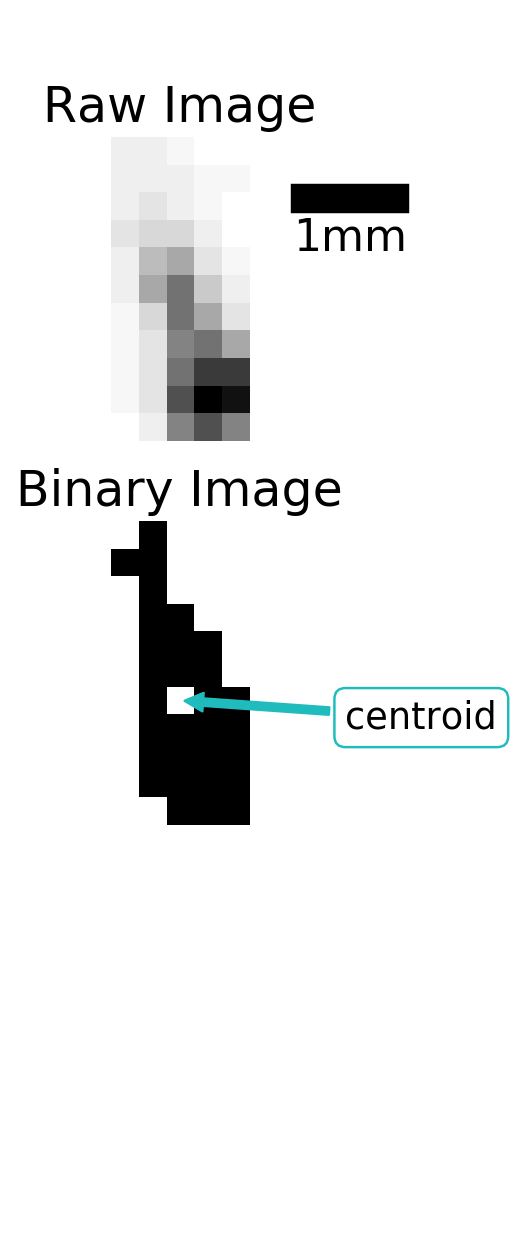

In [5]:
# Which image do we want to use?
image_number = 6103

bounding_boxes[::2,image_number]
centroids.shape
actual_centroid = centroids[image_number,:] \
                  - np.asarray((bounding_boxes[0,image_number],bounding_boxes[2,image_number]))

binary_image = binary_images[0:np.where(raw_images[:,:,image_number]!= False)[0][-1],
                               0:np.where(raw_images[:,:,image_number]!= False)[1][-1],image_number]
binary_image[actual_centroid[0], actual_centroid[1]] = 0

fig = plt.figure(figsize=(3,7))
ax_left = fig.add_subplot(311)
ax_left.set_rasterization_zorder(1)
ax_left.imshow(~raw_images[0:np.where(raw_images[:,:,image_number]!= False)[0][-1],
                          0:np.where(raw_images[:,:,image_number]!= False)[1][-1],image_number], cmap='Greys')
ax_left.set_title('Raw Image', fontsize=20)

ax_middle = fig.add_subplot(312)
ax_middle.set_rasterization_zorder(1)
ax_middle.imshow(binary_image, cmap='Greys')
ax_middle.set_title('Binary Image', fontsize=20)

#ax_right = fig.add_subplot(313)
#ax_right.set_rasterization_zorder(1)
#ax_right.imshow(skeletons[0:np.where(raw_images[:,:,image_number]!= False)[0][-1],
#                          0:np.where(raw_images[:,:,image_number]!= False)[1][-1],image_number], cmap='Greys')
#ax_right.set_title('Skeleton', fontsize=20)

ax_left.axis('off')
ax_middle.axis('off')
#ax_right.axis('off')

fig.tight_layout()

# to be lazy...values can also be negative
cen_txt_x_displacement = 2
cen_txt_y_displacement = 5

annotation_centroid = ax_middle.annotate('centroid', xy=(actual_centroid[1], actual_centroid[0]), xycoords='data', 
                          xytext=(actual_centroid[0]+cen_txt_x_displacement, actual_centroid[1]+cen_txt_y_displacement), 
                            arrowprops=dict(arrowstyle="simple", color='#20bcbd'), size=15,
                           bbox=dict(boxstyle="round", fc="w",ec="#20bcbd"))

#fig.text(0.8, 0.5, 'centroid', fontsize=14)
# add scalebar
fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax_left.transData,
                           -1*pixel_per_mm, '1mm', 
                           'lower left',
                           pad=+4,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)

ax_left.add_artist(scalebar)

#fig.subplots_adjust(right=0.79,wspace =0.90)
fig.tight_layout()
if save_plot:
    fig.savefig(Path(str(target_path), 'Fig4a.eps'))